# Unsupervised Learning: Clustering Lab





In [2]:
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
from scipy.io import arff

## 1. Initial practice with the K-means and HAC algorithms

### 1.1 (10%) K-means
Run K-means on this [Abalone Dataset.](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/abalone.arff)
The dataset was modified to be smaller. The last datapoint should be on line 359 or the point 0.585,0.46,0.185,0.922,0.3635,0.213,0.285,10. The remaining points are commented out. Treat the output class (last column) as an additional input feature. Create your K-Mmeans model with the paramaters K-means(n_clusters=3, init='random', n_init=1) 

Output the following:
- Class label for each point (labels_)
- The k=3 cluster centers (cluster_centers_)
- Number of iterations it took to converge (n_iter_)
- Total sum squared error of each point from its cluster center (inertia_)
- The total average silhouette score (see sklearn.metrics silhouette_score)

In [3]:
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
# read in dataset
# convert dataset to pd
# split data into X and y
# normalize data?
# declare model
# train_test_split
# fit
# analyze

abalone_data = arff.loadarff('abalone.arff')
abalone_df = pd.DataFrame(abalone_data[0])
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(abalone_df)

# K-means with Abalone
model = KMeans(n_clusters=3, init='random', n_init=1)
model.fit(abalone_df)
print("The array of the class label for each point is: ")
print(model.labels_)
print("\nThe centers of each cluster are as shown: ")
print(model.cluster_centers_)
print("\nIt took " + str(model.n_iter_) + " iterations to converge.")
print("The total sum squared error of each point from its cluster center is ", model.inertia_)
print("The total average silhouette score is ", silhouette_score(abalone_df, model.labels_))


The array of the class label for each point is: 
[0 2 1 1 2 2 0 0 1 0 0 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 2 0
 2 1 1 1 0 2 2 2 2 1 2 2 1 2 2 1 1 2 2 2 2 2 2 2 1 1 2 2 2 1 0 1 2 0 2 0 1
 0 0 1 1 1 0 1 1 0 0 0 1 0 1 1 1 0 1 0 1 0 0 1 2 2 1 2 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 2 1 2 0 2 2 2 2 2 0 0 0 1 2 2 2 2 2 1 1 1 1 1 0 1 1 1 1 1
 2 2 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 2 2 2 2 2 2 2 2 1 0 0 1 1 1
 0 1 1 1 1 0 1 0 2 1 1 1 0 0 1]

The centers of each cluster are as shown: 
[[ 0.61092593  0.4837963   0.16916667  1.2580463   0.48016667  0.25992593
   0.42623148 15.46296296]
 [ 0.52295699  0.41080645  0.1388172   0.76        0.30589247  0.17220968
   0.24027419 10.23655914]
 [ 0.37518868  0.28754717  0.09283019  0.31228302  0.13264151  0.07159434
   0.09832075  6.79245283]]

It took 5 iterations to converge.
The total sum squared error of each point from its cluster center is  529.2542834566341
The total average silhouette score is  0.5184231751282088


*Discussion*: The three clusters look to have different population sizes, with the '0' cluster being the smallest, and the '2' cluster holding the most datapoints. It looks like cluster '0' and cluster '2' have centroids that are fairly close together, while cluster '1' has a centroid that is a little further away. The model only took 5 iterations to converge, which was a lot fewer than I expected. I suspect this is because we are working with a smaller dataset and perhaps the clusters are fairly distinct. However, the sum squared error and the silhouette score work against this hypothesis, as the model only had a score of .51, which is a pretty bad silhouette score. This means that there were likely points that the K-Means algorithm labeled as a certain cluster, that really should have been assigned to another cluster. If I were guessing, I would say that the silhouette score would improve if the K-Means model was trained for a different number of centroids.

### 1.2 (10%) Hierarchical Agglomerative Clustering (HAC) 

Run HAC on the same [Abalone Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/abalone.arff) using complete linkage and k=3.

Output the following:
- Class label for each point (labels_)
- The total average silhouette score

In [4]:
# HAC with Abalone
model = AgglomerativeClustering(linkage='complete', n_clusters=3)
model.fit(abalone_df)
print("The array of the class label for each point is: ")
print(model.labels_)

print("\nThe total average silhouette score is ",
      silhouette_score(abalone_df, model.labels_))

The array of the class label for each point is: 
[1 0 0 0 0 0 2 1 0 2 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 2 2 1 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 2 1
 1 1 0 0 1 1 0 1 1 2 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 2 2 2 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 2 1 1 2 2 1 1 1 0 0 0 0 0 0 0 0 1 1 2 0 0 1
 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0]

The total average silhouette score is  0.5398112398376158


*Discussion*: The HAC model clustered the points differently than the K-Means model did. However, they ended with roughly the same silhouette score with HAC scoring a .54, which was around .03 better than the K-Means model. In class we discussed that using complete linkage in HAC often finds more compact clusters, which I would assume applies to the clusters in this dataset. We also discussed that ward linkage is often the most suitable method for quantitative features, so my prediction is that if a HAC model was trained using ward linkage, it would do better than both the K-Means and the complete linkage model.

## 2. K-means Clustering with the [Iris Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/iris.arff)
Use the Iris data set for 2.1 and 2.2.  Don't include the output label as one of the input features.

### 2.1 (20%) K-means Initial Centroids Experiments
K-means results differ based on the initial centroids used.
- Run K-means 5 times with *k*=4, each time with different initial random centroids (init="random) and with n_init=1.  Give inertia and silhouette scores for each run and discuss any variations in the results.
- SKlearn has a parameter that does this automatically (n_init).  n_init = z runs K-means z times, each with different random centroids and returns the clustering with the best SSE (intertia) of the z runs. Try it out and discuss how it does and how it compares with your 5 runs above.
- Sklearn also has a parameter (init:'K-means++') which runs a simpler fast version of K-means first on the data to come up with good initial centroids, and then runs regular K-means with this centroids.  Try it out (with n_init = 1) and discuss.

In [31]:
# K-means initial centroid experiments
from IPython.display import HTML, display
from tabulate import tabulate

iris_data = arff.loadarff('iris.arff')
cancer_data = pd.DataFrame(iris_data[0])
iris_df = iris_df.drop('class', axis=1)

table = []
for i in range (0,5):
    model = KMeans(n_clusters=4, init='random', n_init=1)
    model.fit(dataset)
    table.append([i+1, model.inertia_, silhouette_score(iris_df, model.labels_)])

headers = ["Trial", "Inertia", "Silhouette Score"]


model = KMeans(n_init=5, n_clusters=4)
model.fit(iris_df)
table.append(['n_init=5', model.inertia_, silhouette_score(iris_df, model.labels_)])

model = KMeans(init='k-means++', n_init=1, n_clusters=4)
model.fit(iris_df)
table.append(['K-means++', model.inertia_, silhouette_score(iris_df, model.labels_)])

display(HTML(tabulate(table, headers=headers, tablefmt='html')))

Trial,Inertia,Silhouette Score
1,71.6613,0.412377
2,71.6571,0.413818
3,57.4733,0.49512
4,71.3404,0.417105
5,57.4733,0.49512
n_init=5,57.3179,0.497826
K-means++,57.4733,0.49512


Results and Discussion: The range of inertia values was fairly small, with the lowest inertia value being the model with the parameter 'n_init=5' (having an inertia of 57.3179) and the highest inertia value being the first randomized model (with an inertia of 71.6613). In comparison to the 'n_init=5' model, the lowest inertia in the grouping of 5 randomized models was a value of 57.4733, which the third and fifth model shared, along with the model defined by the parameter 'init=k-means++'. Although inertia and silhouette score are measuring slightly different metrics, they were consistent one with another in this case, as the 'n_init=5' model had the best silhouette score (.4978), the 'k-means++' model had the second best score (.4951), which it shared with the third and fifth randomized models. I would hypothesize that although that is the case in this run, it is possible to have a run in which the model with the lowest inertia does not necessarily also have the best silhouette score.

### 2.2 (20%) Silhouette Graphs
In this part you will show silhouette graphs for different *k* values.  Install the [Yellowbrick visualization package](https://www.scikit-yb.org/en/latest/quickstart.html) and import the [Silhouette Visualizer](https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html).  This library includes lots of visualization packages which you might find useful. (Note: The YellowBrick silhouette visualizer does not currently support HAC).
- Show Silhouette graphs for clusterings with *k* = 2-6. Print the SSE (inertia) and total silhouette score for each.
- Learn with the default n_init = 10 to help insure a decent clustering.
- Using the silhouette graphs, choose which *k* you think is best and discuss why. Think about and discuss more than just the total silhouette score.

c:\Users\bwall\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


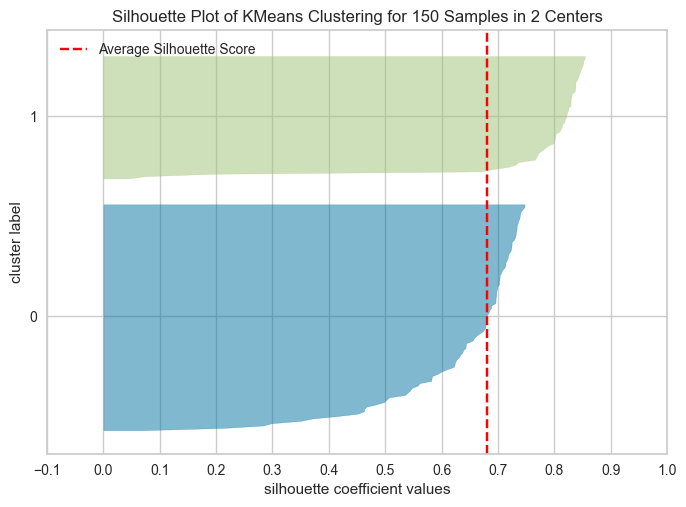

c:\Users\bwall\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


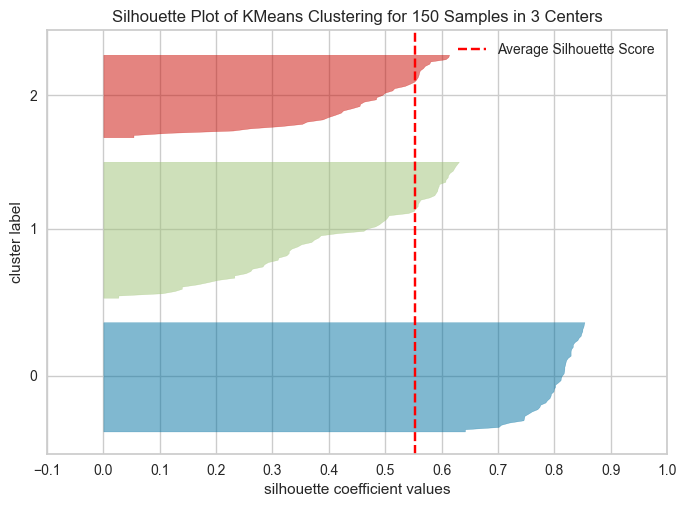

c:\Users\bwall\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


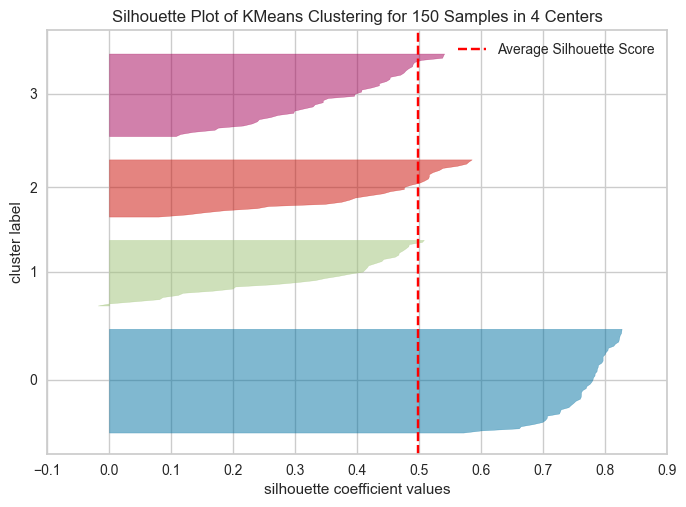

c:\Users\bwall\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


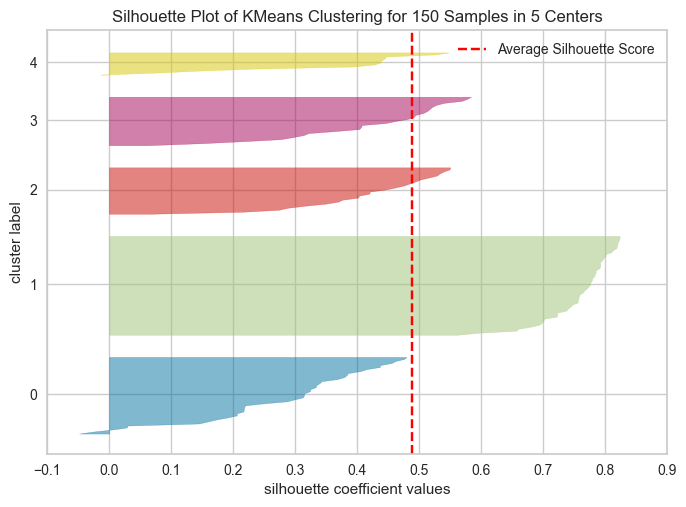

c:\Users\bwall\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


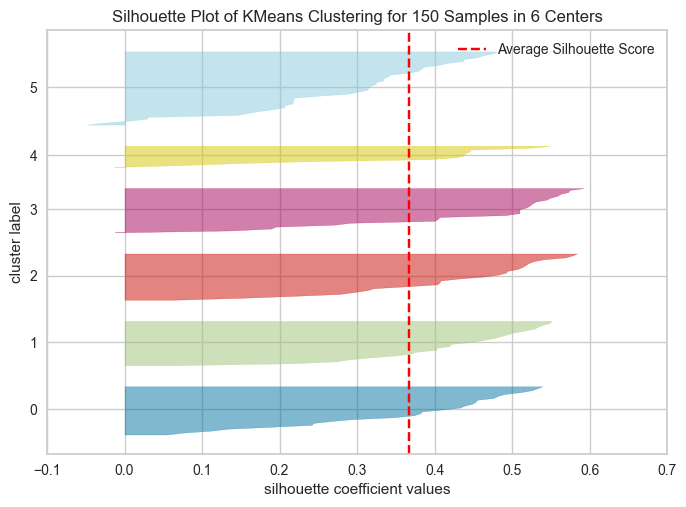

Trial,Inertia,Silhouette Score
2,152.369,0.680814
3,78.9408,0.552592
4,57.3179,0.497826
5,46.5356,0.488518
6,38.9387,0.366504


In [45]:
# Iris Clustering with K-means and silhouette graphs
from yellowbrick.cluster import SilhouetteVisualizer

def test_kmeans_param(dataset):
    table = []
    for i in range(2,7):
        model = KMeans(n_clusters=i, n_init=10)
        model.fit(dataset)
        visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
        visualizer.fit(dataset)
        visualizer.show()
        table.append([i, model.inertia_, silhouette_score(dataset, model.labels_)])

    headers = ["Trial", "Inertia", "Silhouette Score"]
    display(HTML(tabulate(table, headers=headers, tablefmt='html')))

test_kmeans_param(iris_df)

Discuss your results and justify which clustering is best based on the silhouette graphs: Based on the silhouette graphs, k=2 is the parameter that leads to the best clustering. The graphs in which k=4, 5, and 6 all had a few negative values. Meanwhile the k=2 graph holds the highest average silhouette coefficient value, with well over half of the samples having a silhouette score much higher than the average, up to around .85 or so. The model with parameter k=3 has a few samples up in the .85 range as well. However, its average silhouette score is much lower than that of the k=2 model, indicating that the dataset more naturally clusters into two groups. With that being said, the inertia of the k=2 model was fairly high, around 152.369. This is likely because there were several points in both clusters that didn't fit easily into one group or the oher. With all this being considered, the choice of the best k value ultimately comes down to how many clusters we expect to see in the dataset. Because we know ahead of time that there are 3 types of irises in this dataset, k=3 is the best value regardless of its lower silhouette score. However, we didn't have this foreknowledge, then it seems that k=2 would be a strong candidate.

## 3 (20%) Iris Clustering with HAC

- Use the same dataset as above and learn with HAC clustering
- Create one table with silhouette scores for k=2-6 for each of the linkage options single, average, complete, and ward

In [46]:
#HAC with Iris
def test_hac_param(dataset):
    table = []
    for i in range(2, 7):
        model = AgglomerativeClustering(n_clusters=i, linkage='single')
        model.fit(dataset)
        table.append([i, silhouette_score(dataset, model.labels_), 'single'])

        model = AgglomerativeClustering(n_clusters=i, linkage='average')
        model.fit(dataset)
        table.append(['', silhouette_score(dataset, model.labels_), 'average'])

        model = AgglomerativeClustering(n_clusters=i, linkage='complete')
        model.fit(dataset)
        table.append(["", silhouette_score(dataset, model.labels_), 'complete'])

        model = AgglomerativeClustering(n_clusters=i, linkage='ward')
        model.fit(dataset)
        table.append(["", silhouette_score(dataset, model.labels_), 'ward'])

    headers = ["Trial", "Silhouette Score", "Linkage Type"]
    display(HTML(tabulate(table, headers=headers, tablefmt='html')))

test_hac_param(iris_df)

Trial,Silhouette Score,Linkage Type
2,0.686393,single
,0.686393,average
,0.51606,complete
,0.686393,ward
3,0.511839,single
,0.553934,average
,0.51335,complete
,0.554097,ward
4,0.281778,single
,0.471665,average


*Discussion and linkage comparison*: While ward linkage generally did the best across all k-values, most k-values also worked well with at least one other linkage type. The k-value of 2 worked equally well with single linkage, average linkage, and ward linkage. Three clusters had virtually the same silhouette score when working with average linkage or ward linkage. A k-value of 4 did better with complete linkage than with ward linkage, though only by about .011. Five clusters did best with ward linkage with a score of .484, though it also worked well with average linkage, with a score of .43. The k-value of 6 also did best with ward linkage (0.362), but also did nearly just as well with both complete linkage (.342) and average linkage (.341). This makes sense that different numbers of clusters would work best with different linkages, as each linkage tends to adapt better to different shapes. The best splits for 3 clusters will look different and be shaped differently than the best splits for 5 clusters. So the linkage that is able to find the best splits for 3 may not be able to do the same for 5.

## 4 (20%) Run both algorithms on a real world data
- Choose any real world data set which you have not used previously
- Use parameters of your choosing
- Try each algorithm a few times with different parameters and output one typical example of labels and silhouette scores for each algorithm
- Show the silhouette graph for at least one reasonable *k* value for K-means

Experimenting with K-Means: 



c:\Users\bwall\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


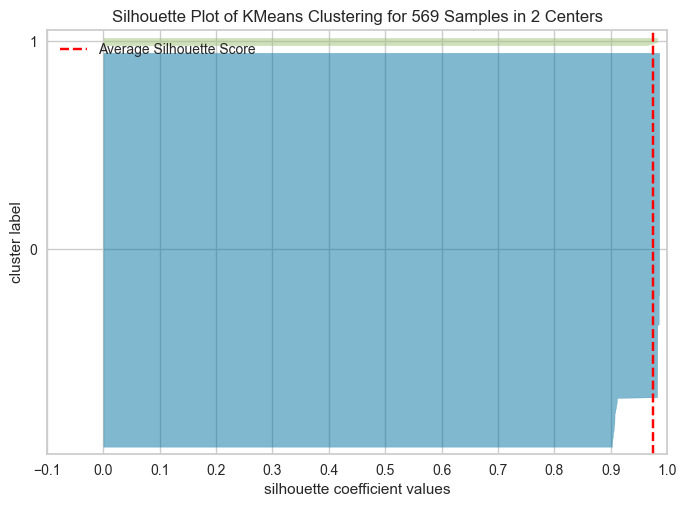

c:\Users\bwall\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


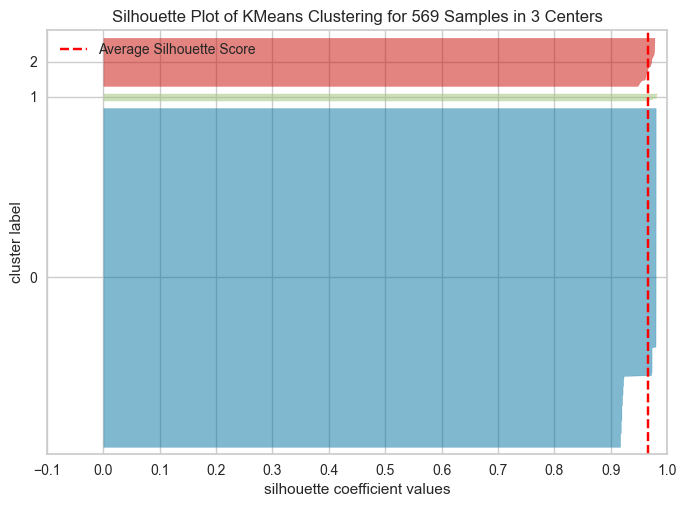

c:\Users\bwall\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


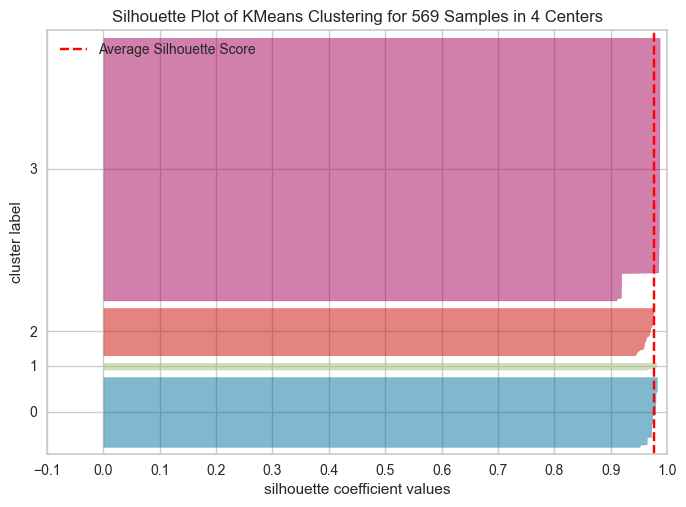

c:\Users\bwall\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


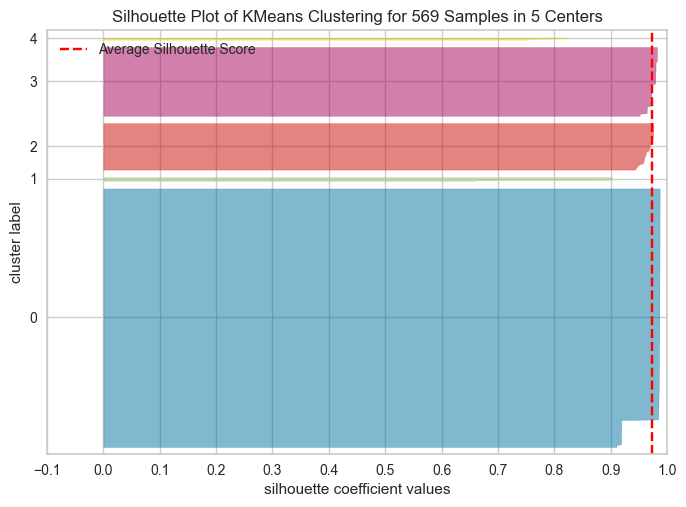

c:\Users\bwall\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


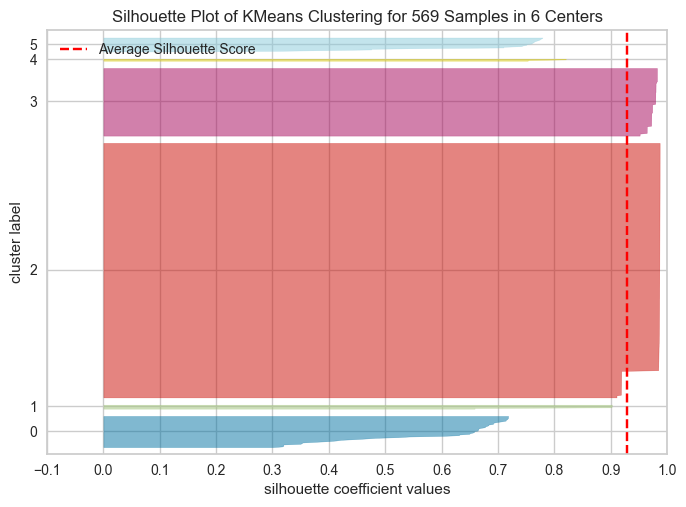

Trial,Inertia,Silhouette Score
2,4.61343e+17,0.975328
3,8.61805e+15,0.966819
4,3.31409e+15,0.976567
5,6.55932e+14,0.973463
6,3.94338e+14,0.928782


Experimenting with HAC: 



Trial,Silhouette Score,Linkage Type
2,0.975328,single
,0.975328,average
,0.975328,complete
,0.975328,ward
3,0.966819,single
,0.966819,average
,0.966819,complete
,0.966819,ward
4,0.963715,single
,0.963715,average


In [50]:
# Run both algoriths on a data set of your choice
cancer_data = pd.read_csv('cancer.csv')
cancer_data = pd.get_dummies(cancer_data, columns=['diagnosis'])
cancer_data.fillna(0, inplace=True)

print("Experimenting with K-Means: \n")
test_kmeans_param(cancer_data)

print("Experimenting with HAC: \n")
test_hac_param(cancer_data)


*Discussion and comparison*: The Breast Cancer Wisconsin Diagnostic Data Set has various features of a tumor, as well as whether that tumor was malignant or benign. Because of this, I was expecting the best silhouette score when the models had two clusters. However, both algorithms did best on a four cluster model, indicating that within the broader categories of malignant or benign, there are also clear sub-groupings of tumors based on features such as perimeter, texture, and area. I wonder if by working with feature selection it would be possible to narrow down what defines the subgroupings outside of just malignant or benign.

## 5. Extra Credit for Coding Your Own Clustering Algorithms
### 5.1 (Optional 10% extra credit) Code up the K-means clustering algorithm 
Below is a scaffold you could use if you want. As above, you only need to support numeric inputs, but think about how you would support nominal inputs and unknown values. Requirements for this task:
- Your model should support the methods shown in the example scaffold below.
- Ability to choose *k* and specify the *k* initial centroids.
- Run and show the cluster label for each point with both the Iris data set and the data set of your choice above.

### 5.2 (Optional 10% extra credit) Code up the HAC clustering algorithm 

- Your model should support the methods shown in the example scaffold below.
- HAC should support both single link and complete link options.
- HAC automatically generates all clusterings from *n* to 2.  You just need to output results for the curent chosen *k*.
- Run and show the cluster label for each point with both the Iris data set and the data set of your choice above.

Discussion and comparision of each model implemented

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin, ClusterMixin

class KMEANSClustering(BaseEstimator,ClusterMixin):

    def __init__(self,k=3,debug=False): ## add parameters here
        """
        Args:
            k = how many final clusters to have
            debug = if debug is true use the first k instances as the initial centroids otherwise choose random points as the initial centroids.
        """
        self.k = k
        self.debug = debug

    def fit(self, X, y=None):
        """ Fit the data; In this lab this will make the K clusters :D
        Args:
            X (array-like): A 2D numpy array with the training data
            y (array-like): An optional argument. Clustering is usually unsupervised so you don't need labels
        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)
        """
        return self
    
    def print_labels(self): # Print the cluster label for each data point
        pass

In [ ]:
class HACClustering(BaseEstimator,ClusterMixin):

    def __init__(self,k=3,link_type='single'): ## add parameters here
        """
        Args:
            k = how many final clusters to have
            link_type = single or complete. when combining two clusters use complete link or single link
        """
        self.link_type = link_type
        self.k = k
        
    def fit(self, X, y=None):
        """ Fit the data; In this lab this will make the K clusters :D
        Args:
            X (array-like): A 2D numpy array with the training data
            y (array-like): An optional argument. Clustering is usually unsupervised so you don't need labels
        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)
        """
        return self
    
    def print_labels(self): # Print the cluster label for each data point
        pass